Bagging与随机森林
===

# 1.组合算法概述
## 1.1.弱分类器和强分类器
最好的分类器是支持向量机,通常正确率为50%左右的是比较弱的分类器，而正确率在80%或者90%以上的就是比较好的分类器。我们可以联合使用多个弱分类器，来形成一个强的分类器

## 1.2.分类器的组合算法
- 装袋(bagging)-随机森林
- 提升(boosting)-GBT、Adaboost、XGBoost
- Stacking

我们可以用多个弱分类器，然后通过这三种不同的框架来实现一个强的分类器

# 2.Bagging
## 2.1.Bagging概述
bagging能提升机器学习算法的稳定性和准确性，它可以减少模型的方差从而避免overfitting。它通常应用在决策树方法中，其实它可以应用到任何其它机器学习算法中

## 2.2.Bagging的过程-自助式抽样
我们需要构造多个弱分类器，但是又不能多次重复使用同一份数据(因为这样做只会得到同一个结果)，所以就需要构造不同的数据。用来构造不同的数据集的方法，就是自助式抽样。从总体m条记录中，有放回的抽出m个样本，组成的就是自助式抽样，由于是有放回的，所以抽出的m条记录是可能有重复记录的，所以两个m是不一样的。再一次抽样过程中，某一个样本被抽中的概率是$\frac{1}{m}$，那么它不被抽中的概率就是$1-\frac{1}{m}$，那么在一轮自助式抽样过程中，这个样本都没有被抽中的概率是$p=(1-\frac{1}{m})^m$，那么我们极限$\lim\limits_{m\to\infty}p=\lim\limits_{m\to\infty}(1-\frac{1}{m})^m=e^{-1}\approx0.368$，所以用自助式抽样所抽出的样本，能够覆盖总体样本的概率是$1-0.368=0.632=63.2$%。也就是说63.2%的数据用于生成分类器，剩下的36.8%就可以用来做测试数据。bagging的一种常见方法是我们训练好多模型：SVM, 决策树，DNN 等，然后将最后再用一个lr做组合

## 2.2.Bagging的过程-算法过程
![images](images/01_05_001.png)<br/>
每个子训练集都是经过有放回的自助性抽样过程选出的训练集
Bagging(Bootstrap aggregating的缩写)算法是最早的集成学习算法，具体步骤可以描述为：
- 利用Bootstrap方法重采样(自助式抽样)，随机产生T个训练集$S_1,S_2,...,S_T$;
- 利用每个训练集，生成对应的分类器$C_1,C_2,...,C_T$，可以是SVM，决策树，逻辑回归，一般用决策树；
- 对于测试数据集样本X，利用每个决策树进行测试，得到对应的类别$C_1(X),C_2(X),...,C_T(X)$；
- 采用投票的方法，将T个决策树中输出最多的类别作为测试集样本X所属的类别

## 2.3.举例
假设有一个训练集D的大小为7，我想用bagging生成3个新的训练集$D_i$,每个$D_i$的大小为7，结果如下表
![images](images/01_05_002.png)<br/>
那么现在我就可以用上面生成的3个新训练集来拟合模型了。

# 3.随机森林
## 3.1.概述
随机森林和Bagging算法唯一的区别是：**随机森林在生成决策树的时候用随机选择的特征，在Bagging算法中，选择训练样本是通过重采样的方法随机选取的，但是对于每条数据，Bagging算法会选择完整特征；但是随机森林不会选择完整特征，它会随机选择部分特征**。之所以这么做的原因是，如果训练集中的几个特征对输出的结果有很强的预测性，那么这些特征会被每个决策树所应用，这样会导致树之间具有相关性，这样并不会减小模型的方差。在自助式抽样的基础上，随机抽取几个属性来构成数据，相当于数据和属性都是随机的.本身来说，决策树是弱分类器，只不过在数据随机或者属性随机的情况下，决策树就变成了弱分类器，通过若干个弱分类器的组合，我们就形成了一个可以跟支持向量机相媲美的强分类器，所以，随机森林包含四个步骤：随机选择样本、随机选择特征、构建决策树、随机森林投票分类

## 3.2.随机选择样本
给定一个训练样本集，数量为N，我们使用**有放回采样**到N个样本，构成一个新的训练集。注意这里是有放回的采样，所以会采样到重复的样本。详细来说，就是采样N次，每次采样一个，放回，继续采样。即得到了N个样本。然后我们把这个样本集作为训练集，进入下面的一步

## 3.3.随机选择特征
在构建决策树的时候，在一个节点上计算所有特征的Information Gain(ID3)或者Gain Ratio(C4.5)，然后选择一个最大增益的特征作为划分下一个子节点的走向。但是，在随机森林中，我们不计算所有特征的增益，而是从总量为M的特征向量中，随机选择m个特征，其中m可以等于$\sqrt{M}$，然后计算m个特征的增益，选择最优特征（属性）。注意，这里的**随机选择特征是无放回的选择**！

## 3.4.构建决策树
有了上面随机产生的样本集，我们就可以使用一般决策树的构建方法，得到一棵分类（或者预测）的决策树。需要注意的是，在计算节点最优分类特征的时候，我们要使用上面的随机选择特征方法。而选择特征的标准可以是我们常见的Information Gain(ID3)或者 Gain Ratio(C4.5)

## 3.5.随机森林投票分类
通过上面的三步走，我们可以得到一棵决策树，我们可以重复这样的过程H次，就得到了H棵决策树。然后来了一个测试样本，我们就可以用每一棵决策树都对它分类一遍，得到了H个分类结果。这时，我们可以使用简单的投票机制，或者该测试样本的最终分类结果

## 3.6.优缺点
- 优点：它能够处理很高维度（feature很多）的数据，并且不用做特征选择；由于随机选择样本导致的每次学习决策树使用不同训练集，所以可以一定程度上避免过拟合；
- 缺点：随机森林已经被证明在某些噪音较大的分类或回归问题上会过拟合；对于有不同级别的属性的数据，级别划分较多的属性会对随机森林产生更大的影响，所以随机森林在这种数据上产出的属性权值是不可信的。

# 4.总结
决策树是一个很流行的机器学习算法。这个算法的性能在特征值的缩放和各种转换的情况下依然保持不变，即使在包含不相关特征的前提下，它依然很健壮。然而，决策树很容易过拟合训练集。它有低的偏差，但是有很高的方差，因此它的准确性不怎么好。bagging是早期的集成方法(ensemble method)，它可以重复地构建多个决策树基于有放回地重新采样，然后集成这些决策树模型进行投票，从而得到更好地准确性。

## 4.1.正确采样率
下面的程序模拟了采样次数以及正确采样率

9 次采样正确率： 0.6214209454492188
109 次采样正确率： 0.8529248106496278
209 次采样正确率： 0.9266174850684462


309 次采样正确率： 0.9611075441817517


409 次采样正确率： 0.9787555232982922


509 次采样正确率： 0.9881786394306903


609 次采样正确率： 0.9933384209653018


709 次采样正确率： 0.9962112837399784


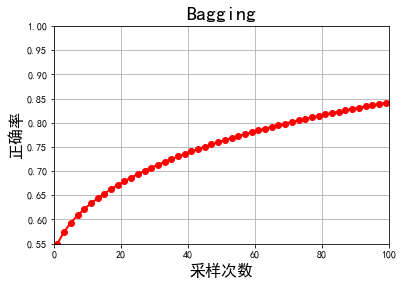

In [22]:
import operator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from functools import reduce

def c(n, k):
    len1 = n - k + 1
    len2 = n + 1
    len3 = k + 1
    c1 = reduce(operator.mul, range(len1, len2))
    c2 = reduce(operator.mul, range(1, len3))
    return  c1 / c2;

def bagging(n, p):
    s = 0
    for i in range(int(n / 2 + 1), int(n + 1)):
        s += c(n, i) * p ** i * (1 - p) ** (n - i)
    return s

n = 800
x = np.arange(1, n, 2)
y = np.empty_like(x, dtype=np.float)
for i, t in enumerate(x):
    y[i] = bagging(t, 0.55)
    if t % 100 == 9:
        print(t, '次采样正确率：', y[i])
mpl.rcParams[u'font.sans-serif'] = u'SimHei'
mpl.rcParams[u'axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(x, y, 'ro-', lw=2)
plt.xlim(0,100)
plt.ylim(0.55, 1)
plt.xlabel(u'采样次数', fontsize=16)
plt.ylabel(u'正确率', fontsize=16)
plt.title(u'Bagging', fontsize=20)
plt.grid(b=True)